In [332]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from decimal import Decimal
import tempfile, shutil
import pandas as pd


In [ ]:
input_folder = '/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/scripts/CorsikaReaderFiles/'
input_file = 'DAT091221_Fe.dat'

input_path = input_folder + input_file
shower_id, shower_e, shower_zenith, shower_aximuth =np.loadtxt(input_path,max_rows =1)  #for rows
pid, ek, x, y, cx, cy, t, w = np.loadtxt(input_path, skiprows = 1, unpack=True)

def get_shower_id_string(id): 
    if id == 1: 
        return 'gamma'
    if id==14: 
        return 'p'
    if id==5626.0: 
        return 'Fe'
    else: 
        print(id)
        raise 'Particle ID not in this database'


In [334]:
str_shower_energy_eV = '%.2E' % Decimal(str(shower_e * 1e9)) + ' eV' # String of shower energy in eV

string_shower_id = get_shower_id_string(shower_id)

In [335]:
energy_df = pd.DataFrame({'ID':pid, 'Ekin':ek, 'x':x, 'y':y, 'Weight':w})

In [336]:
gamma_df = energy_df.loc[energy_df['ID']==1]
elec_df = energy_df.loc[np.logical_or(energy_df['ID']==2, energy_df['ID']==3) ]
mu_df = energy_df.loc[np.logical_or(energy_df['ID']==5, energy_df['ID']==6) ]
#elec_df = energy_df.loc[energy_df['ID']==2]
#mu_df = energy_df.loc[energy_df['ID']==5]

gamma_energy = gamma_df['Ekin']
elec_energy = elec_df['Ekin']
mu_energy = mu_df['Ekin']

gamma_weight = gamma_df['Weight']
elec_weight = elec_df['Weight']
mu_weight = mu_df['Weight']

Total number of particles:  644072
Total number of particles:  60426
Total number of particles:  23610


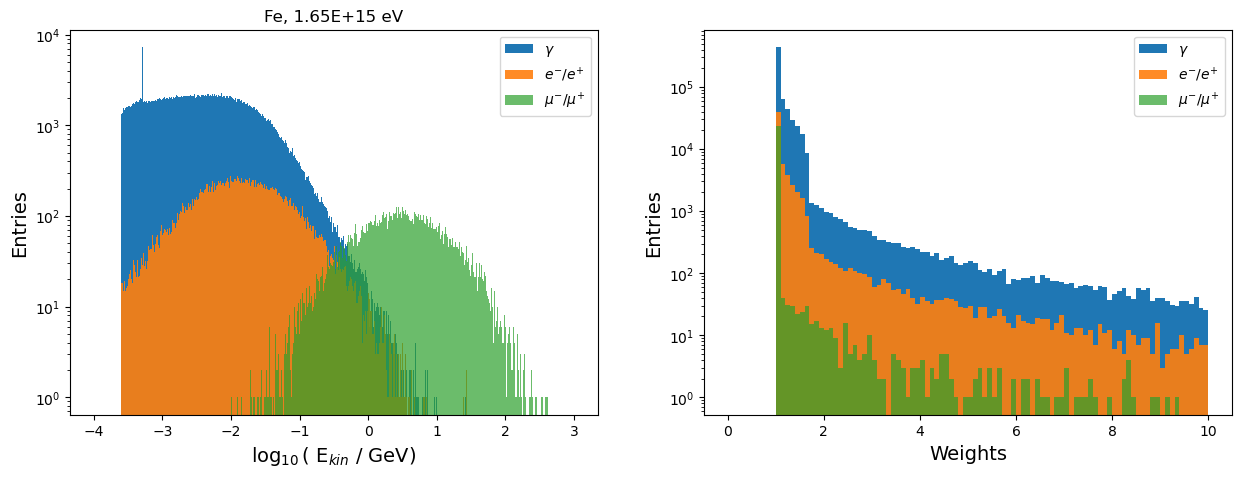

In [337]:
ebins = np.linspace(-4,3,1000)

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(np.log10(gamma_energy), bins=ebins, label=r'$\gamma$')
plt.hist(np.log10(elec_energy), bins=ebins, label=r'$e^{-}/e^{+}$',alpha=0.9)
plt.hist(np.log10(mu_energy),bins=ebins, label=r'$\mu^{-}/\mu^{+}$',alpha=0.7)
plt.yscale('log')
plt.xlabel(r'$\log_{10}$( E$_{kin}$ / GeV)',size=14)
plt.ylabel('Entries',size=14)
plt.title(string_shower_id + ', ' +str_shower_energy_eV)
plt.legend()

plt.subplot(1,2,2)
wbins = np.arange(0,10+0.1,0.1)
plt.hist(gamma_weight, bins=wbins, label=r'$\gamma$')
plt.hist(elec_weight, bins=wbins, label=r'$e^{-}/e^{+}$',alpha=0.9, )
plt.hist(mu_weight,bins=wbins, label=r'$\mu^{-}/\mu^{+}$',alpha=0.7)
plt.yscale('log')
plt.xlabel(r'Weights',size=14)
plt.ylabel('Entries',size=14)
plt.legend()

for l in [gamma_energy, elec_energy, mu_energy]: 
    print('Total number of particles: ',len(l))

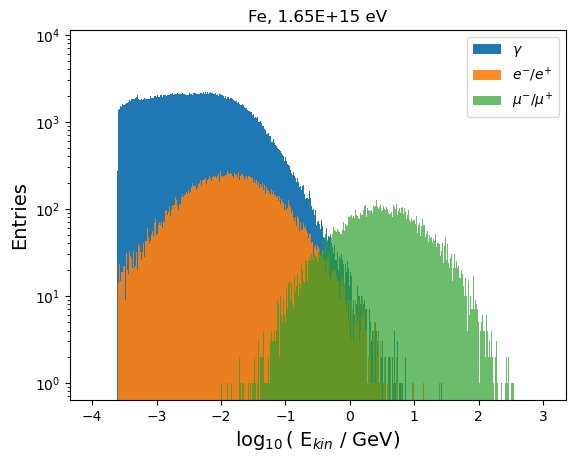

In [338]:
plt.hist(np.log10(gamma_energy), bins=ebins, label=r'$\gamma$')
plt.hist(np.log10(elec_energy), bins=ebins, label=r'$e^{-}/e^{+}$',alpha=0.9)
plt.hist(np.log10(mu_energy),bins=ebins, label=r'$\mu^{-}/\mu^{+}$',alpha=0.7)
plt.yscale('log')
plt.xlabel(r'$\log_{10}$( E$_{kin}$ / GeV)',size=14)
plt.ylabel('Entries',size=14)
plt.title(string_shower_id + ', ' +str_shower_energy_eV)
plt.legend()
plt.savefig('/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/scripts/plots/'+input_file.replace('.dat','.pdf'))

Text(0, 0.5, 'y / m')

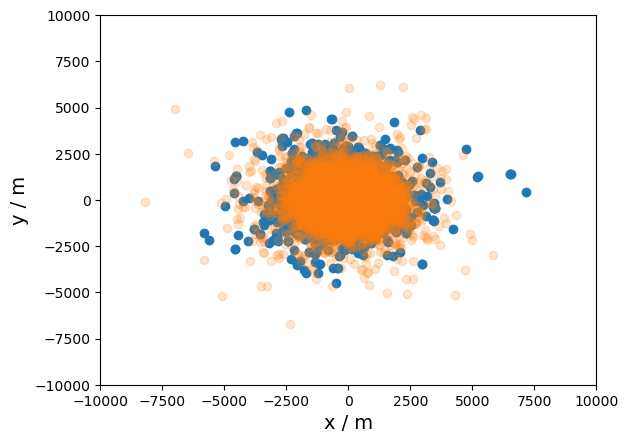

In [339]:
plt.scatter(elec_df['x'], elec_df['y'])
plt.scatter(mu_df['x'], mu_df['y'], alpha=0.2)
plt.xlim(-10000,10000)
plt.ylim(-10000,10000)
plt.xlabel('x / m',size=14)
plt.ylabel('y / m',size=14)



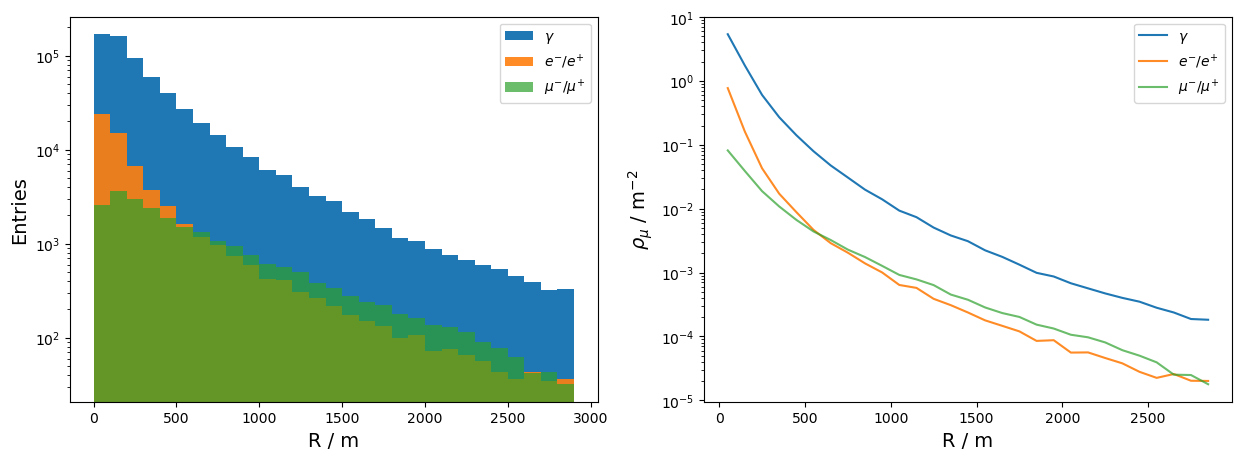

In [340]:
r_gamma = np.sqrt(gamma_df['x']**2 + gamma_df['y']**2) 
r_elec = np.sqrt(elec_df['x']**2 + elec_df['y']**2) 
r_muons = np.sqrt(mu_df['x']**2 + mu_df['y']**2) 

r_bins = np.arange(0,3e3,1e2)
r_bins_center = (r_bins[:-1] +  r_bins[1:]) / 2.
r_min = r_bins[:-1]
r_max = r_bins[1:]

ring_area = np.pi * (r_max**2 - r_min**2)

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
gamma_counts, bins, fig = plt.hist(r_gamma, bins=r_bins, label=r'$\gamma$')
elec_counts, bins, fig = plt.hist(r_elec, bins=r_bins, label=r'$e^{-}/e^{+}$',alpha=0.9, )
mu_counts, bins, fig = plt.hist(r_muons,bins=r_bins, label=r'$\mu^{-}/\mu^{+}$',alpha=0.7)
plt.xlabel('R / m',size=14)
plt.yscale('log')
plt.ylabel('Entries',size=14)
plt.legend()

plt.subplot(1,2,2)
mu_density = mu_counts / ring_area
elec_density = elec_counts / ring_area
gamma_density = gamma_counts / ring_area
plt.plot(r_bins_center, gamma_density, label=r'$\gamma$')
plt.plot(r_bins_center, elec_density, label=r'$e^{-}/e^{+}$',alpha=0.9)
plt.plot(r_bins_center, mu_density, label=r'$\mu^{-}/\mu^{+}$', alpha=0.7)
plt.xlabel('R / m',size=14)
plt.ylabel(r'$\rho_{\mu}$ / m$^{-2}$',size=14)
plt.yscale('log')
plt.legend()